<h1 style="color:orange">EXERCISE CLASS 2 - SPC for iid data </h1>



# EXTRA EXERCISE 1

Data reported in `spheres.csv` represent the diameters of spheres in a recirculating ball mechanism widely used in machine tool industry. The component is very critical and the tolerance is 10 ± 0.5mm. 

Verify if the process is in control by using an X-bar and R chart.

In [10]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda

# Import the dataset
data = pd.read_csv('../../Data/spheres.csv')

# Inspect the dataset
data.head()

,x1,x2,x3,x4,x5
0,10.10,10.04,10.13,9.98,10.14
1,10.28,10.13,9.78,9.94,9.83
2,9.95,10.36,9.90,9.96,9.96
3,9.88,9.89,9.98,9.74,10.14
4,10.12,9.83,10.14,9.81,9.86


> ### Solution
>
> Inspect the data by plotting the individual datapoints. 

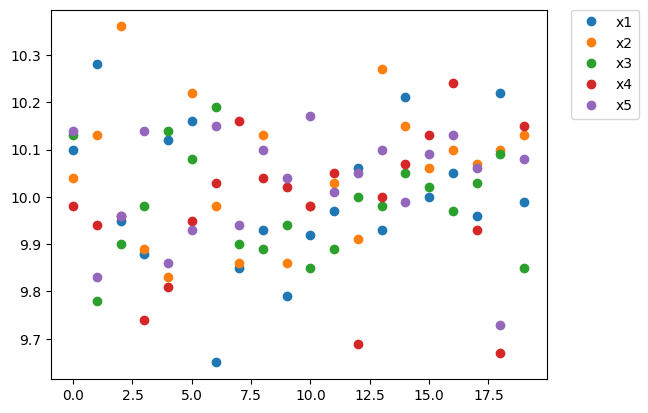

In [11]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['x5'], linestyle='none', marker='o', label = 'x5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> Doesn't look like strange patterns or outliers are present.
>
> We might also check randomness but we would need to know the within-sample order!

> Verify the assumption of normality, assuming all the data are from the same population.

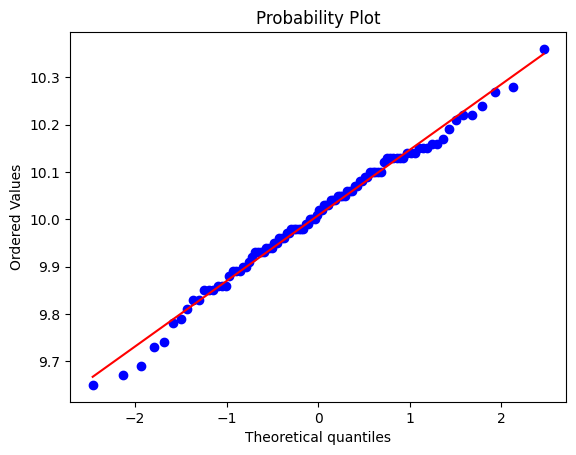

Shapiro-wilk test statistic = 0.991
Shapiro-wilk test p-value = 0.753


In [12]:
# Stack the data into a single column
data_stack = data.stack()

# To check the normality of the data we can use the qda.Assumptions().normality()
# method that incorporates a Shapiro-Wilk test and the QQ-plot of the data

sw_statistic, sw_pvalue = qda.Assumptions(data_stack).normality()

> Let's compute the mean and the range for each sample. 
> 
> *Note: we need to apply the mean and range functions to each row of the data frame.*

In [13]:
# Make a copy of the data
data_XR = data.copy()
# Add a column with the mean of the rows
data_XR['sample_mean'] = data.mean(axis=1)
# Add a column with the range of the rows
data_XR['sample_range'] = data.max(axis=1) - data.min(axis=1)

# Inspect the dataset
data_XR.head()

,x1,x2,x3,x4,x5,sample_mean,sample_range
0,10.10,10.04,10.13,9.98,10.14,10.078,0.16
1,10.28,10.13,9.78,9.94,9.83,9.992,0.50
2,9.95,10.36,9.90,9.96,9.96,10.026,0.46
3,9.88,9.89,9.98,9.74,10.14,9.926,0.40
4,10.12,9.83,10.14,9.81,9.86,9.952,0.33


> Now compute the grand mean and the mean of the ranges.

In [14]:
Xbar_mean = data_XR['sample_mean'].mean()
R_mean = data_XR['sample_range'].mean()

print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % R_mean)

Mean of the sample mean: 10.008
Mean of the sample range: 0.314


> Since there is no constraint on the choice of Type I error $\alpha$, we can set K = 3 ($\alpha$ = 0.0027)
>
> Remember the formulas for the control limits.
>
> **$\mathbf{\bar{X}}$ chart**:
> - $UCL = \overline{\overline{X}} + A_2(n) \overline{R}$
> - $CL = \overline{\overline{X}}$
> - $LCL = \overline{\overline{X}} - A_2(n) \overline{R}$
>
> **$R$ chart**:
> - $UCL = D_4(n) \overline{R}$
> - $CL = \overline{R}$
> - $LCL = D_3(n) \overline{R}$

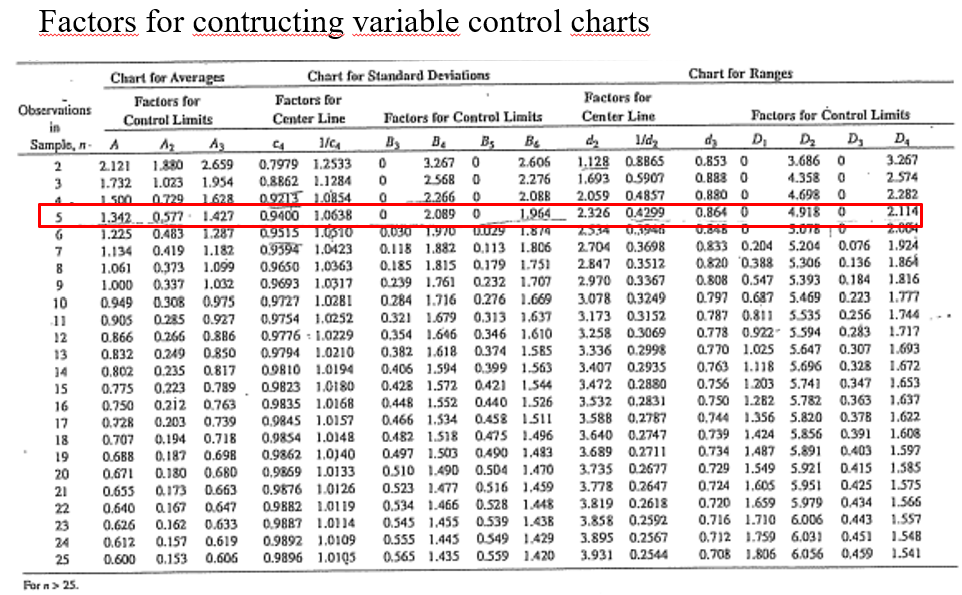

In [15]:
n = 5
A2 = 0.577
D3 = 0
D4 = 2.114

# Now we can compute the CL, UCL and LCL for Xbar and R
data_XR['Xbar_CL'] = Xbar_mean
data_XR['Xbar_UCL'] = Xbar_mean + A2 * R_mean
data_XR['Xbar_LCL'] = Xbar_mean - A2 * R_mean

data_XR['R_CL'] = R_mean
data_XR['R_UCL'] = D4 * R_mean
data_XR['R_LCL'] = D3 * R_mean

# Inspect the dataset
data_XR.head()

,x1,x2,x3,x4,x5,sample_mean,sample_range,Xbar_CL,Xbar_UCL,Xbar_LCL,R_CL,R_UCL,R_LCL
0,10.10,10.04,10.13,9.98,10.14,10.078,0.16,10.0082,10.189378,9.827022,0.314,0.663796,0.0
1,10.28,10.13,9.78,9.94,9.83,9.992,0.50,10.0082,10.189378,9.827022,0.314,0.663796,0.0
2,9.95,10.36,9.90,9.96,9.96,10.026,0.46,10.0082,10.189378,9.827022,0.314,0.663796,0.0
3,9.88,9.89,9.98,9.74,10.14,9.926,0.40,10.0082,10.189378,9.827022,0.314,0.663796,0.0
4,10.12,9.83,10.14,9.81,9.86,9.952,0.33,10.0082,10.189378,9.827022,0.314,0.663796,0.0


> Add two columns to store the violations of the control limits.

In [16]:
data_XR['Xbar_TEST1'] = np.where((data_XR['sample_mean'] > data_XR['Xbar_UCL']) | 
                (data_XR['sample_mean'] < data_XR['Xbar_LCL']), data_XR['sample_mean'], np.nan)
data_XR['R_TEST1'] = np.where((data_XR['sample_range'] > data_XR['R_UCL']) | 
                (data_XR['sample_range'] < data_XR['R_LCL']), data_XR['sample_range'], np.nan)

> Now plot the limits and the data in the charts.

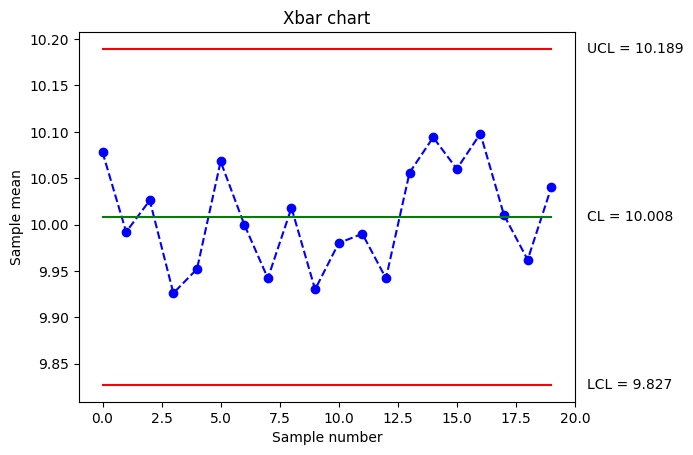

In [17]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XR['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['Xbar_UCL'], color='r')
plt.plot(data_XR['Xbar_CL'], color='g')
plt.plot(data_XR['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.xlim(-1, len(data_XR))
plt.show()

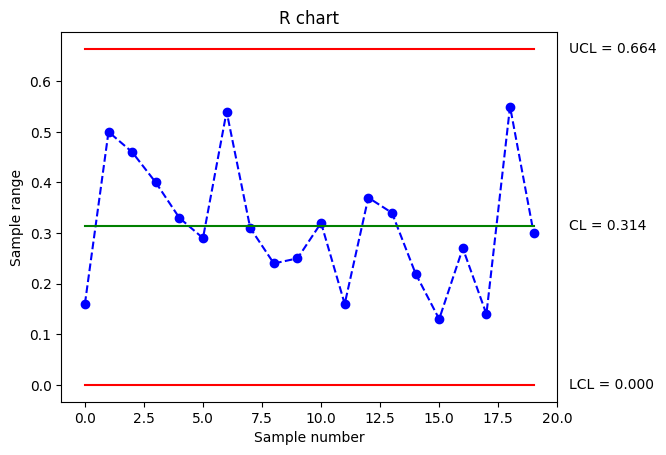

In [18]:
# Plot the R chart
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.xlim(-1, len(data_XR))
plt.show()

> The process is in control.

> Alternatively, we can use the `XbarR` function in the `qda.ControlCharts` class.

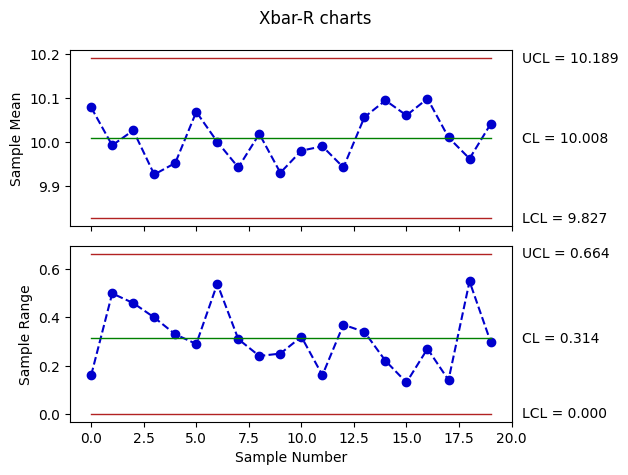

In [19]:
# Create the control chart with the data
data_XR_qcc = qda.ControlCharts.XbarR(data)

In [20]:
data_XR_qcc

,x1,x2,x3,x4,x5,sample_mean,sample_range,Xbar_CL,Xbar_UCL,Xbar_LCL,R_CL,R_UCL,R_LCL,Xbar_TEST1,R_TEST1
0,10.10,10.04,10.13,9.98,10.14,10.078,0.16,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
1,10.28,10.13,9.78,9.94,9.83,9.992,0.50,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
2,9.95,10.36,9.90,9.96,9.96,10.026,0.46,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
3,9.88,9.89,9.98,9.74,10.14,9.926,0.40,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
4,10.12,9.83,10.14,9.81,9.86,9.952,0.33,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
5,10.16,10.22,10.08,9.95,9.93,10.068,0.29,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
6,9.65,9.98,10.19,10.03,10.15,10.000,0.54,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
7,9.85,9.86,9.90,10.16,9.94,9.942,0.31,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
8,9.93,10.13,9.89,10.04,10.10,10.018,0.24,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN
9,9.79,9.86,9.94,10.02,10.04,9.930,0.25,10.0082,10.189321,9.827079,0.314,0.663953,0.0,NaN,NaN


# EXTRA EXERCISE 1 (continued)

Given the previous dataset:
1. Redesign the X-bar and R chart in order to achieve in both the charts a Type I error equal to 0.002 (assuming that the normal approximation applies for both of them).
2. Determine the operating characteristic curve (OC) for the X-bar chart (by using K=3 and expressing the shift of the mean in standard deviation units)
3. Determine the corresponding ARL curve. 
4. Estimate the standard deviation through the statistic $R$.
5. Design the confidence interval on the process mean that corresponds to the control limits computed in point 1.

## Point 1
Redesign the X-bar and R chart in order to achieve in both the charts a Type I error equal to 0.002 (assuming that the normal approximation applies for both of them).

> ### Solution
>
> Assuming that the normal approximation applies for both of them, we need to find the value of K such that $\alpha = 0.002$:
> $$K = z_{\alpha/2}$$



In [21]:
# Compute the new K_alpha value
alpha = 0.002
K_alpha = stats.norm.ppf(1-alpha/2)

print('K = %.3f' % K_alpha)

K = 3.090


> Now let's design the control charts with the new value of K. 
>
> Remember the formulas for the control limits for $K \neq 3$.
>
> **$\mathbf{\bar{X}}$ chart**:
> - $UCL = \overline{\overline{X}} + z_{\alpha/2} \frac{1}{d_2 \sqrt{n}} \overline{R}$
> - $CL = \overline{\overline{X}}$
> - $LCL = \overline{\overline{X}} - z_{\alpha/2} \frac{1}{d_2 \sqrt{n}} \overline{R}$
>
> **$R$ chart**:
> - $UCL = \overline{R} + z_{\alpha/2} \frac{d_3}{d_2} \overline{R}$
> - $CL = \overline{R}$
> - $LCL = max(0;\ \overline{R} - z_{\alpha/2} \frac{d_3}{d_2} \overline{R})$

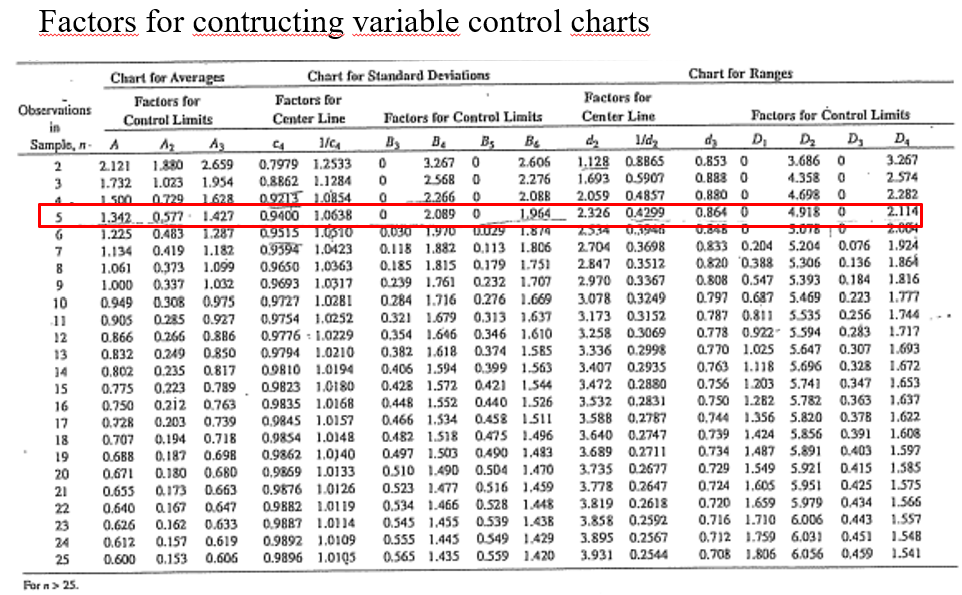

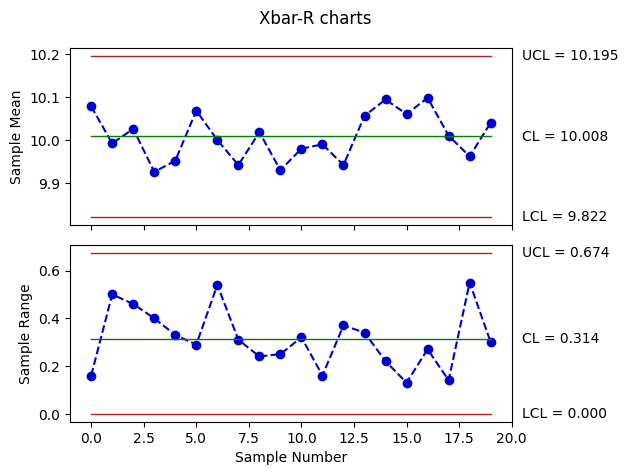

In [22]:
# We can use the same function again. This time we need to specify the new K_alpha value
data_XR_alpha = qda.ControlCharts.XbarR(data, K = K_alpha)

## Point 2

Determine the operating characteristic curve (OC) for the X-bar chart (by using K=3 and expressing the shift of the mean in standard deviation units).

> ### Solution
>
> To determine the OC curve, we need to compute the probability of $\beta$ for each value of the shift $\mu$.
> 
> We are testing the null hypothesis $H_0$ that the sample mean $\bar{X}$ is normally distributed with mean $\mu_0$ and variance $\sigma^2 / n$.
> $$H_0: \bar{X} \sim N(\mu_0, \sigma^2 / n)$$
>
> The alternative hypothesis is that the sample mean is normally distributed with mean $\mu_1$ and variance $\sigma^2 / n$.
> $$H_1: \bar{X} \sim N(\mu_1, \sigma^2 / n)$$
>
> So $\beta$ is the probability of not rejecting $H_0$ when $H_1$ is true.
> $$\beta = P(LCL \leq \bar{X} \leq UCL | H_1)$$
> $$\beta = P(Z \leq \frac{UCL - \mu_1}{\sigma / \sqrt{n}}) - P(Z \leq \frac{LCL - \mu_1}{\sigma / \sqrt{n}})$$
> If we define $\delta = (\mu_1 - \mu_0) / \sigma$, we can write:
> $$\beta = P(Z \leq 3 - \delta \sqrt{n}) - P(Z \leq -3 - \delta \sqrt{n})$$

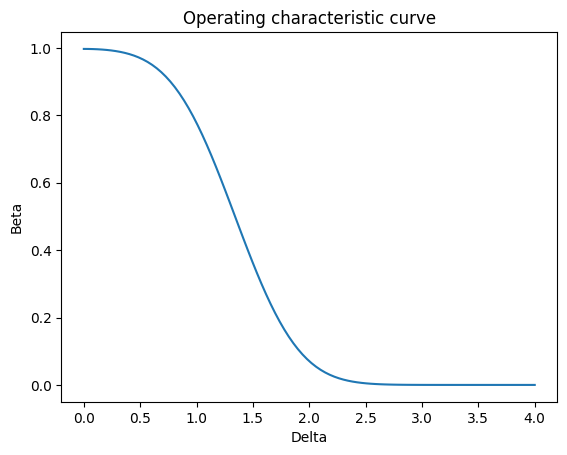

In [27]:
# Define a range of values for beta
delta = np.linspace(0, 4, 100)
# Compute the corresponding beta values
beta = stats.norm.cdf(3 - delta*np.sqrt(n)) - stats.norm.cdf(-3 - delta*np.sqrt(n))

# Plot the beta values
plt.plot(delta, beta)
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

## Point 3

Determine the corresponding ARL curve.

> ### Solution
>
> We know that the ARL curve is defined as:
> $$ARL = \frac{1}{1-\beta}$$

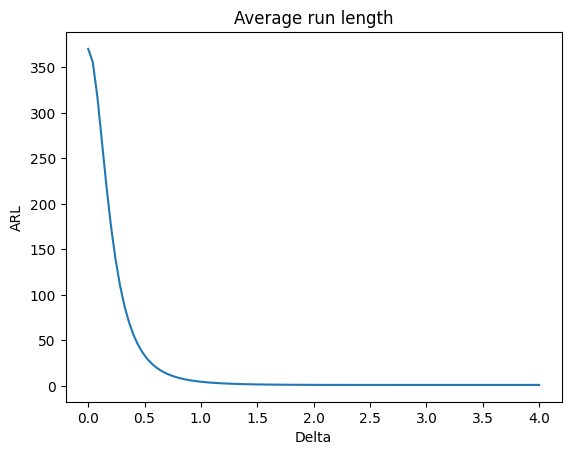

In [24]:
# Compute ARL using the previous values of beta
ARL = 1/(1-beta)

# Plot the ARL values
plt.plot(delta, ARL)
plt.xlabel('Delta')
plt.ylabel('ARL')
plt.title('Average run length')
plt.show()

## Point 4

Estimate the standard deviation through the statistic $R$.

> ### Solution
>
> The standard deviation is estimated through the statistic $R$ as:
> $$\hat{\sigma} = \frac{\bar{R}}{d_2(n)}$$

> You can use the function `getd2` from `qda.constants` to get the value of $d_2(n)$.

In [25]:
d2 = qda.constants.getd2(n)
sigma_hat = R_mean / d2
print('Sigma_hat = %.3f' % sigma_hat)

Sigma_hat = 0.135


## Point 5

Design the confidence interval on the process mean that corresponds to the control limits computed in point 1.

> ### Solution
>
> The confidence interval corresponding to the control limits computed in point 1 uses: 
> - $n = 5$
> - $\alpha = 0.002$
> - $\hat{\sigma} = 0.135$ (computed from the data)
> - $\overline{X} = 10.008$ (computed from the data)
>
> Remember the formula of the confidence interval (assume that $\hat{\sigma}$ is the real population variance):
> $$\bar{X} - z_{\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}} \leq \mu \leq \bar{X} + z_{\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}}$$


> You can compute the CI using the formula or using the `interval` function from the `stats.norm` package.

In [26]:
CI = stats.norm.interval(1-alpha, loc=Xbar_mean, scale=sigma_hat/np.sqrt(n))
print('CI = (%.3f, %.3f)' % CI)

CI = (9.822, 10.195)


The CI limits correspond to the LCL and UCL of the control chart. Indeed, the X-bar control chart can be interpreted as a recursive application of the confidence interval on the mean along time t, assuming that the estimated sample variance is the real (population) variance.